# <span style="color:#54B1FF">Dimensionality Reduction:</span> &nbsp; <span style="color:#1B3EA9"><b>Principal Components Analysis (PCA)</b></span>

<br>

A very common dimensionality reduction algorithm is [principal component analysis](https://en.wikipedia.org/wiki/Principal_component_analysis) (PCA). "Principal components", or "PCs", are linear combinations of the original variables that represent the "directions" of maximum variance.

PCA is an unsupervised technique.

Let's study PCA by example...

<br>

___

First let's import the modules we'll need for this lecture.

<br>

In [1]:

import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA


<a name="toc"></a>
# Table of Contents

* [PCA Example: &nbsp; Two-variable dataset](#ex2d)
* [PCA Example: &nbsp; Three-variable dataset](#ex3d)
* [PCA Example: &nbsp; Six-variable dataset](#ex6d)
* [PCA Example: &nbsp; Six-variable dataset (geometric interpretation)](#ex6dA)
* [Summary](#summary)

___

<a name="ex2d"></a>
# PCA Example:  &nbsp; Two-variable dataset
[Back to Table of Contents](#toc)
<br>

Let's create a random, correlated dataset consisting of two variables.

<br>
<br>

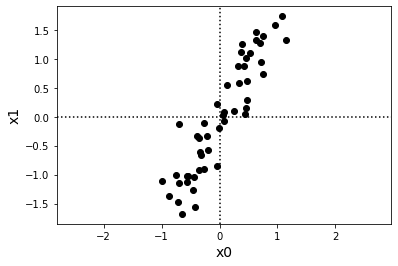

In [2]:

n  = 50                    # number of data points
x0 = np.linspace(-1, 1, n) # variable 0
x1 = 1.5 * x0 + 0          # variable 1 (slope * x0 + intercept) (perfectly correlated with x0)


# add noise to both variables:
np.random.seed(0)
x0 = x0 + 0.2 * np.random.randn(n)
x1 = x1 + 0.2 * np.random.randn(n)


# plot the dataset:
plt.figure()
ax = plt.axes()
ax.plot(x0, x1, 'ko', label='Data')
ax.axhline(0, color='k', linestyle=':')
ax.axvline(0, color='k', linestyle=':')
ax.axis('equal')
ax.set_xlabel('x0', size=14)
ax.set_ylabel('x1', size=14)
plt.show()


<br>
<br>

Next let's conduct PCA.

Note that, for PCA, like most routines in **sklearn**, the data must be organized into an (*m*,*n*) array, where:

* *m* = number of observations
* *n* = number of features

<br>
<br>

In [3]:

x   = np.vstack( [x0,x1] ).T   # combine x0 and x1 into a (50,2) array

pca = PCA(n_components=2)      # there are 2 variables;  in general, always use all variables
pca.fit(x)

print( pca )


PCA(n_components=2)


<br>
<br>

Finished!  The PCA outputs are given by attributes with an underscore suffix. For example, `pca.mean_`:

<br>
<br>

In [4]:

print( pca.mean_ )


[ 0.02811185 -0.00418865]


<br>
<br>

Note that this is the sample mean:

<br>
<br>

In [5]:

print( x.mean(axis=0) )


[ 0.02811185 -0.00418865]


 <br>
 <br>
 
 To explore the all PCA outputs, first use the `dir` command to check all variables associated with the `pca` object.
 
 <br>
 <br>

In [6]:

print( dir(pca) )


['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_check_n_features', '_fit', '_fit_full', '_fit_svd_solver', '_fit_truncated', '_get_param_names', '_get_tags', '_more_tags', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_validate_data', 'components_', 'copy', 'explained_variance_', 'explained_variance_ratio_', 'fit', 'fit_transform', 'get_covariance', 'get_params', 'get_precision', 'inverse_transform', 'iterated_power', 'mean_', 'n_components', 'n_components_', 'n_features_', 'n_features_in_', 'n_samples_', 'noise_variance_', 'random_state', 'score', 'score_samples', 'set_params', 'singular_values_', 'svd_solver', 't

<br>
<br>

Note that there are a number of output variables including:

* `components_`
* `explained_variance_`
* `explained_variance_ratio_`
* `mean_`
* `n_components_`
* `n_features_`
* `n_samples_`
* `noise_variance_`
* `singular_values_`

This list can be printed using the `dir` command as follows:
<br>
<br>

In [7]:

for s in dir(pca):
    if not s.startswith('_'):
        if s.endswith('_'):
            print(s)
            

components_
explained_variance_
explained_variance_ratio_
mean_
n_components_
n_features_
n_features_in_
n_samples_
noise_variance_
singular_values_


<br>
<br>

Explanations of these and other variables are avaialable in [Scikit-Learn's PCA documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

Here we'll just consider a few variables.

First let's first check the simplest variables, which are the count variables (those that start with `n`):

<br>
<br>

In [8]:

print( pca.n_components_ )
print( pca.n_features_ )
print( pca.n_samples_ )


2
2
50


<br>

* `n_components_` &nbsp; is the number of components we specified in the command `pca = PCA(n_components=2)`

* `n_features_` &nbsp; is the number of variables

* `n_samples_` &nbsp; is the number of observations

<br>

The two most important variables are: `components_` and `explained_variance_ratio_`.  These variables are essential when reporting PCA results.  


* `components_` : &nbsp; ordered PCs (each row is a PC, and the first row is "PC-1")
* `explained_variance_ratio_` : &nbsp; the proportion of variance in the dataset that each PC explains

<br>
<br>

In [9]:

print( pca.components_ )
print()
print( pca.explained_variance_ratio_ )


[[ 0.47607743  0.87940336]
 [-0.87940336  0.47607743]]

[0.97023792 0.02976208]


<br>
<br>

The first and second PCs are:

<br>
<br>

In [10]:

pc0 = pca.components_[0]
pc1 = pca.components_[1]

print( f'First PC  : {pc0}')
print( f'Second PC : {pc1}')


First PC  : [0.47607743 0.87940336]
Second PC : [-0.87940336  0.47607743]


<br>
<br>

These PCs are **unit vectors** that specify linear combinations of the original variables `x0` and `x1`.

They can equivalently be thought of as **direction vectors** which specify a direction in the `x0`, `x1` space.

They can be visualized as follows.

<br>
<br>

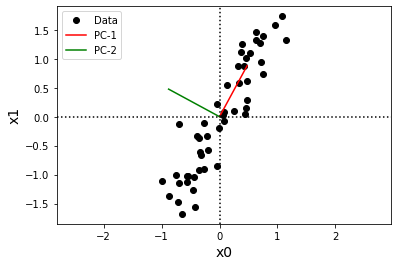

In [11]:

plt.figure()
ax = plt.axes()
ax.plot(x0, x1, 'ko', label='Data')
ax.plot([0,pc0[0]], [0,pc0[1]], 'r-', label='PC-1')
ax.plot([0,pc1[0]], [0,pc1[1]], 'g-', label='PC-2')
ax.axhline(0, color='k', linestyle=':')
ax.axvline(0, color='k', linestyle=':')
ax.axis('equal')
ax.legend(loc='upper left')
ax.set_xlabel('x0', size=14)
ax.set_ylabel('x1', size=14)
plt.show()


<br>
<br>

Note that PC-1 points in the direction of maximum variance, and that the last PC (PC-2) points in the direction of minimum variance.

The `explained_variance_ratio_` variable shows that the proportions of total variance explained by each PC are 97.0% and 3.0%, respectively.

<br>
<br>

In [12]:

print( pca.explained_variance_ratio_ )


[0.97023792 0.02976208]


<br>
<br>

This implies that nearly all of the variance in this dataset can be explained by just ONE variable (PC-1), and thus that the original two variables are not needed to describe the largest source of variance.

As an interpretive aid, imagine that `x0` and `x1` represent two variables that we know are correlated. For example, imagine that:

* `x1` represents muscle size
* `x2` represents muscle strength

We know that muscle size and strength are generally correlated, so we do not necessarily need both variables to explain the variance between difference muscles.

There are three key ML concepts to introduce here:

* **Variables are generally correlated**: nearly all variables in real datasets are correlated. Sometimes they are weakly correlated, but they are never perfectly uncorrelated.

* **ML algorithms generally work best on as few variables as possible**:  PCA or other dimensionality reduction techniques are usually necessary to ensure that ML algorithms run effectively.

* As a general rule of thumb, **use only those PCs that represent 90% (or more) of the total variance**.  In our example above, PC-1 represents 97% of the variance, so we would use only PC-1 when conducting machine learning.


Let's check what happens to the PCs and their explained variance proportions when we increase the noise:

<br>
<br>

First PC  : [0.28357893 0.9589489 ]
Second PC : [-0.9589489   0.28357893]

Explained variance ratio : [0.70959789 0.29040211]


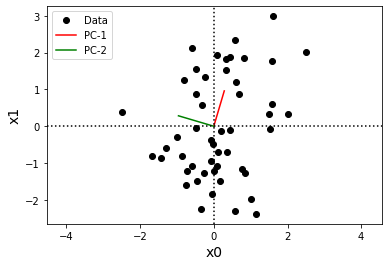

In [13]:

n  = 50                    # number of data points
x0 = np.linspace(-1, 1, n) # variable 0
x1 = 1.5 * x0 + 0          # variable 1 (slope * x0 + intercept) (perfectly correlated with x0)

# add noise to both variables:
np.random.seed(0)
x0 = x0 + 0.9 * np.random.randn(n)
x1 = x1 + 0.9 * np.random.randn(n)

x   = np.vstack( [x0,x1] ).T   # combine x0 and x1 into a (50,2) array

pca = PCA(n_components=2)      # there are 2 variables;  in general, always use all variables
pca.fit(x)

pc0 = pca.components_[0]
pc1 = pca.components_[1]


print( f'First PC  : {pc0}')
print( f'Second PC : {pc1}')
print()
print( f'Explained variance ratio : {pca.explained_variance_ratio_}' )


plt.figure()
ax = plt.axes()
ax.plot(x0, x1, 'ko', label='Data')
ax.plot([0,pc0[0]], [0,pc0[1]], 'r-', label='PC-1')
ax.plot([0,pc1[0]], [0,pc1[1]], 'g-', label='PC-2')
ax.axhline(0, color='k', linestyle=':')
ax.axvline(0, color='k', linestyle=':')
ax.axis('equal')
ax.legend(loc='upper left')
ax.set_xlabel('x0', size=14)
ax.set_ylabel('x1', size=14)
plt.show()


<br>
<br>

We can see that PC-1 and PC-2 point in similar directions to the previous example (because the underlying true regression is identical).

However, PC-1 now explains much less variance: only 71%.

<br>
<br>

___

<a name="ex3d"></a>
# PCA Example:  &nbsp; Three-variable dataset
[Back to Table of Contents](#toc)
<br>

Let's consider a real dataset from the scientific literature.  The dataset below comes from Dorn et al. (2012), and represents three-dimensional ground reaction forces (GRF) during running and sprinting. GRF represents the forces that act between the foot and the ground. Larger GRF implies greater acceleration. Larger GRF in the forward direction implies greater forward velocity and thus ultimately faster running.

Let's load the data, plot it, then conduct PCA.


The original data are available at: &nbsp; https://simtk.org/home/runningspeeds

<br>
<br>

**Reference**:

Dorn, T. W., Schache, A. G., & Pandy, M. G. (2012). Muscular strategy shift in human running: dependence of running speed on hip and ankle muscle performance. Journal of Experimental Biology, 215(11), 1944–1956. http://doi.org/10.1242/jeb.064527

<br>
<br>
<br>


In [14]:

fnameNPY = 'Dorn2012.npy'   # this file is available in this Notebook's folder
grf      = np.load(fnameNPY)

print(grf.shape)


(18, 100, 3)


<br>
<br>

The array dimensions correspond to:

* ` 18` : &nbsp; number of observations
* `100` : &nbsp; number of time nodes  (time = 0% to 100%) , (0% = foot strike) , (100% = push-off)
* `  3` : &nbsp; number of variables (3 force components: vertical, forward, and rightward)

For PCA analysis (below), we'll consider only the three force components, and not time. While it is possible to also consider time, this type of PCA is advanced and beyond the scope of this course.

Let's plot the three force components in three separate panels:

<br>
<br>

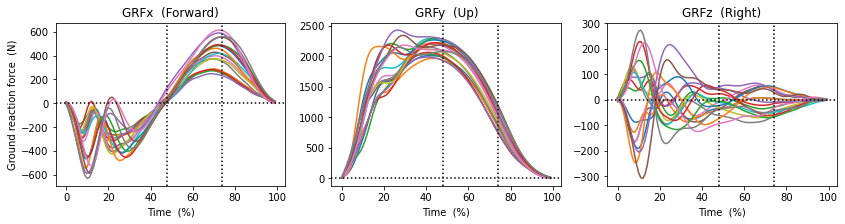

In [15]:

grf_x = grf[:,:,0]
grf_y = grf[:,:,1]
grf_z = grf[:,:,2]


fig,ax = plt.subplots(1, 3, figsize=(14,3))
ax[0].plot( grf_x.T )
ax[1].plot( grf_y.T )
ax[2].plot( grf_z.T )

[axx.axhline(0, color='k', ls=':')  for axx in ax]
[axx.axvline(48, color='k', ls=':')  for axx in ax]
[axx.axvline(74, color='k', ls=':')  for axx in ax]

plt.setp(ax, xlabel='Time  (%)')
ax[0].set_ylabel('Ground reaction force  (N)')
ax[0].set_title('GRFx  (Forward)')
ax[1].set_title('GRFy  (Up)')
ax[2].set_title('GRFz  (Right)')

plt.show()


<br>
<br>

The dotted horizontal line represents zero force.

The dotted vertical lines represent two time instants (time = 48% and time = 74%). We will conduct PCA analyses separately at these time instants. Time=48% represents the time of approximately zero forward force (i.e., during the transition from braking to acceleration). Time=74% represents the approximate time of maximum forward force, and thus maximum forward acceleration.


Here are a few general mechanical interpretations of this figure above:

* Vertical force (GRFy) is the largest
* Vertical force is only positive (i.e., since the foot is not mechanically stuck to the ground, the ground can only push upward on the foot)
* Forward force (GRFx) is negative for the first half of time, then positive for the second half of time. This corresponds to braking forces (when the foot first contacts the ground), then accelerating forces (as the foot pushes off from the ground).
* Constant running speed is achieved if the braking impulse is equal to the acceleration impulse (i.e., the negative area in the GRFx panel is equal to the positive area)

These interpretations are irrelevant to PCA, but can help us to interpret PCA results.

Let's now conduct PCA at the two different time instants:  time = 48% and time = 74%.  First let's consider time = 74%.

<br>
<br>

In [16]:

x = grf[:,74,:]

print( x.shape )


(18, 3)


<br>
<br>

Note that the `x` data are in the (*m*, *n*) format that PCA requires, where: 

* *m* = number of observations
* *n* = number of variables

Let's plot these data, then conduct PCA.

<br>
<br>

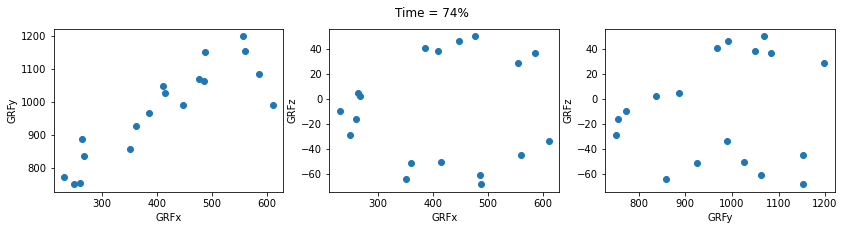

In [17]:

fig,ax = plt.subplots( 1, 3, figsize=(14,3) )

ax[0].plot(x[:,0], x[:,1], 'o')
ax[1].plot(x[:,0], x[:,2], 'o')
ax[2].plot(x[:,1], x[:,2], 'o')

plt.setp(ax[0], xlabel='GRFx', ylabel='GRFy')
plt.setp(ax[1], xlabel='GRFx', ylabel='GRFz')
plt.setp(ax[2], xlabel='GRFy', ylabel='GRFz')

plt.suptitle('Time = 74%')

plt.show()


<br>
<br>

Note that there appears to be a relatively strong correlation between the GRFx and GRFy data at this time.

Let's now conduct PCA on these data:

<br>
<br>

In [18]:

pca = PCA(n_components=3)
pca.fit(x)

print( pca.components_ )
print()
print( pca.explained_variance_ratio_ )


[[-0.6548357  -0.75544976 -0.02204245]
 [ 0.7241419  -0.61881447 -0.30444567]
 [-0.21635323  0.21532375 -0.95227463]]

[0.89114878 0.06273157 0.04611965]


<br>
<br>

These results suggest that:

* The first PC explains nearly 90% of the variance in these data (at time = 74%)
* The first PC is `[-0.6548357  -0.75544976 -0.02204245]`, which implies similar contributions from the first two variables (GRFx and GRFy), with effectively no contribution from the third variable (GRFz).
* Thus rightward forces are effectively irrelevant for explaining overall variance in this dataset
* Nearly all of the variance can be explained by a single variable, which approximately represents the magintude of force in the X-Y plane.

Let's try repeating this 3-component PCA at the instant time=48%.

<br>
<br>

[[-0.11445769 -0.99297549 -0.02998524]
 [ 0.18307844  0.00858287 -0.98306084]
 [ 0.97641268 -0.11800852  0.18081002]]

[0.84231583 0.10898882 0.04869535]


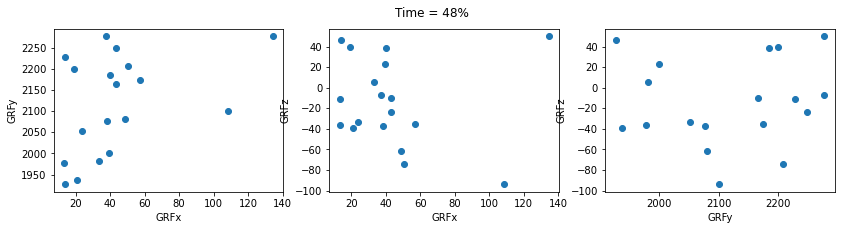

In [19]:

x = grf[:,48,:]


pca = PCA(n_components=3)
pca.fit(x)

print( pca.components_ )
print()
print( pca.explained_variance_ratio_ )



fig,ax = plt.subplots( 1, 3, figsize=(14,3) )

ax[0].plot(x[:,0], x[:,1], 'o')
ax[1].plot(x[:,0], x[:,2], 'o')
ax[2].plot(x[:,1], x[:,2], 'o')

plt.setp(ax[0], xlabel='GRFx', ylabel='GRFy')
plt.setp(ax[1], xlabel='GRFx', ylabel='GRFz')
plt.setp(ax[2], xlabel='GRFy', ylabel='GRFz')

plt.suptitle('Time = 48%')

plt.show()


<br>
<br>

The first PC is `[-0.11445769 -0.99297549 -0.02998524]`, and this component explains approximatey 84% of the variance.

Thus, at this instant in time, nearly all of the variance is explained by the second variable (GRFy, or vertical force). Mechanically this implies that variance at this time occurs primarily in upward accerlation.

These two PCA examples have shown how PCA can help to:

* Reduce the number of variables to a smaller number of variables that represent the largest variation
* Provide quantitative perspectives on the data (especially `pca.explained_variance_ratio_`) which are not easy to interpret from the oroginal data.

<br>
<br>

___

<a name="ex6d"></a>
# PCA Example:  &nbsp; Six-variable dataset
[Back to Table of Contents](#toc)
<br>

This example uses the attached **6var.npy** dataset.

Let's load the dataset and check its size.

<br>

In [20]:

fnameNPY = '6var.npy'
x        = np.load(fnameNPY)

print( x.shape )
print()
print( x.mean(axis=0) )


(20, 6)

[ 0.01025027  0.02222516  1.2421771   1.0096371   2.00779472 -0.00230082]


<br>
<br>

The data array has a shape of `(20, 6)`, implying that there are 20 observations and six variables. The mean of each of these six variable is shown above.

Since there are six variables, the data are six-dimensional, which means that they are impossible to visualize directly. Let's get a basic idea of the data by plotting the means and standard deviations of each variable.

<br>
<br>

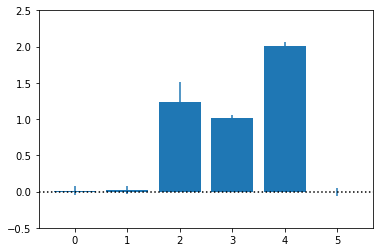

In [21]:

m = x.mean(axis=0)
s = x.std(axis=0, ddof=1)

plt.figure()
ax = plt.axes()
a  = np.arange(6)
ax.bar(a, m)
ebar = ax.errorbar(a, m, yerr=s)
ebar[0].set_visible(False)
ax.axhline(0, color='k', ls=':')
ax.set_ylim(-0.5, 2.5)
plt.show()


<br>
<br>

Variable 4 has the larges mean, and Variable 2 has the largest variance. Other than this, there is little other information available in mean and standard deviations.

While we could visually check for correlations amongst variables, there are many combinations (0-1, 0-2, 0-3, ... 4-5), so this is not practical.

Instead of plotting the data, let's conduct PCA and see what it tells us.

<br>
<br>

In [22]:

pca = PCA(n_components=6)
pca.fit(x)

print(pca.components_)
print()
print(pca.explained_variance_ratio_)


[[ 0.01402629 -0.06077039 -0.99747801 -0.01351765  0.01182531 -0.02872754]
 [ 0.85530635 -0.22603479  0.01674827  0.07973691  0.25502509  0.3816845 ]
 [-0.03989321 -0.18836776  0.0266258   0.53675718  0.6136515  -0.54547296]
 [-0.08012085 -0.71344304  0.05889919 -0.64381206  0.14910543 -0.21067552]
 [ 0.48610418  0.0659933   0.01671629 -0.03056478 -0.53367822 -0.68798367]
 [ 0.15474569  0.62958458 -0.01730973 -0.53844484  0.50120787 -0.19556386]]

[0.84438584 0.05041816 0.04276773 0.02995738 0.01930704 0.01316385]


<br>
<br>

From these results it is clear that the first PC is dominated by the third variable, and that other variables contribute very little to the first PC.

It is also clear that the first PC represents a large proportion (84.4%) of the variance in this dataset.

Other than this, there is little that we conclude because we don't know the true meanings of the six variables. The example below uses the same data, but considers a specific geometric meaning for each of the variables.

<br>
<br>

___

<a name="ex6dA"></a>
# PCA Example:  &nbsp; Six-variable dataset (geometric interpretation)
[Back to Table of Contents](#toc)
<br>

This example, like the [example above](#ex6d), uses the attached **6var.npy** dataset.

Let's imagine that we know that the six variables in this dataset represent the XY coordinates of the three coordinates of a triangle.

<br>

That is, the six variables are:

* `x0` : &nbsp; the x coordinate of the first point
* `y0` : &nbsp; the y coordinate of the first point
* `x1` : &nbsp; the x coordinate of the second point
* `y1` : &nbsp; the y coordinate of the second point
* `x2` : &nbsp; the x coordinate of the third point
* `y2` : &nbsp; the y coordinate of the third point

<br>

The dataset thus represents 20 different triangles. Let's plot all 20 of these triangles.

<br>

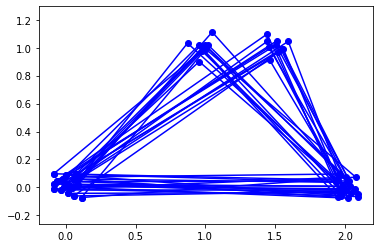

In [23]:

def plot_triangle(ax, r, color='b'):
    x0,y0,x1,y1,x2,y2 = r
    ax.plot([x0,x1,x2,x0], [y0,y1,y2,y0], 'o-', color=color)
    

fnameNPY = '6var.npy'
x        = np.load(fnameNPY)
    
plt.figure()
ax = plt.axes()
for r in x:
    plot_triangle(ax, r)
ax.axis('equal')
plt.show()


<br>
<br>

We now have a much different interpretation of the data. In the example above, the data consisted of six arbitrary variables, which had no meaning.  In this example, the six variables define a 2D geometric triangular shape.

From the figure above we can see that the largest variation in triangle shape appears to be the location of the top point.

Let's reconsider the PCA results:

<br>
<br>

In [24]:

pca = PCA(n_components=6)
pca.fit(x)

print(pca.components_)
print()
print(pca.explained_variance_ratio_)


[[ 0.01402629 -0.06077039 -0.99747801 -0.01351765  0.01182531 -0.02872754]
 [ 0.85530635 -0.22603479  0.01674827  0.07973691  0.25502509  0.3816845 ]
 [-0.03989321 -0.18836776  0.0266258   0.53675718  0.6136515  -0.54547296]
 [-0.08012085 -0.71344304  0.05889919 -0.64381206  0.14910543 -0.21067552]
 [ 0.48610418  0.0659933   0.01671629 -0.03056478 -0.53367822 -0.68798367]
 [ 0.15474569  0.62958458 -0.01730973 -0.53844484  0.50120787 -0.19556386]]

[0.84438584 0.05041816 0.04276773 0.02995738 0.01930704 0.01316385]


<br>
<br>

Like the example above, we see that the third variable explains most of the variation in this dataset.

However, unlike the example above, we now have a much richer interpretation of what this actually means. Since the third variable represents the X position of the second point (the top point), the PCA results imply the following:

* **The horizontal position of the top triangle point accounts for approximately 84% of the shape variance in this dataset**

This PCA interpretation is much more meaningful than in the example above.  This illustrates another important point:

* The interpretability of PCA results depends upon the relations amongst the variables. If the variables are clearly related (e.g. point coordinates representing a shape), then the PCA results are more meaningful.

However, this is not the only advantage of having a clear relation amongst variables. A second interpretive advantage can be seen by plotting the first PC itself, in the context of the original data.

<br>
<br>

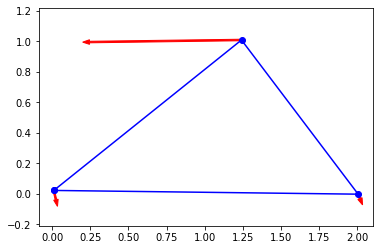

In [25]:

def plot_pc(r, pc):
    x0,y0,x1,y1,x2,y2       = r
    dx0,dy0,dx1,dy1,dx2,dy2 = pc
    plt.arrow(x0, y0, dx0, dy0, color='r', width=0.01)
    plt.arrow(x1, y1, dx1, dy1, color='r', width=0.01)
    plt.arrow(x2, y2, dx2, dy2, color='r', width=0.01)
    
    
r  = x.mean(axis=0)   # overall mean geometry


plt.figure()
ax = plt.axes()
plot_triangle(ax, r)
plot_pc(r, pca.components_[0])
ax.axis('equal')
plt.show()


<br>
<br>

This figure represents the first PC. For this dataset, PCs can be interpreted as point displacement vectors, which represent the directions of larges shape variance.  In this case, the first PC indicates that the largest variance exists for the top point, in the horizontal direction.

If we didn't know that the six variables represent point locations, then the PCs would just be six-component variables. In other words, PCs become more meaningful when the relations amongst variables are well known.

<br>
<br>

___
<a name="summary"></a>
# Summary
[Back to Table of Contents](#toc)

* PCA is a common dimensionality reduction technique.
* PCA can be used to reduce a large number of features to a smaller number of variables, usually with the goal of choosing a small number of (abstract) features that represent a large proportion of dataset variability.
* PCA (or other dimensionality reduction techniques) are usually conducted prior to machine learning (ML), partly to make ML algorithms run more efficiently.
* PCA can be applied to datasets with an arbitrarily large number of features.
* It is easiest to interpret PC results when the relations amongst the features are well-understood.